In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
# точность 2-адического числа
e = 20

In [3]:
# универсальная функция
# Принимает на вход вершины с пустыми связями, функцию, с помощью которой будет осуществляться вычисление, а также число которое будет подставляться в mod
def calculate_by_func(verticles: dict, func, n_mod):
    # Для каждой вершины
    for k in verticles.keys():
        # вычисли первую связь
        b = func(k, n_mod)
        # записываем вычисленную связь в вершину
        verticles[k] = set([b])
        # создаём путь пройденный вершиной
        arr = [b]
        while(True):
            # вычисляем следующую связь
            c = func(arr[-1], n_mod)
            # Если вернулись в предыдущую точку, то выходим из цикла
            if (c in arr):
                break
            # Иначе добавляем вычисленную связь в вершину
            else: 
                arr.append(c)
                verticles[k].add(c)

In [4]:
# Функция вычисления f(x) по модулю n из Задания 1
def calculate_f_1(a, n):
    return (18 + a - 7*(a**2)) % n

In [5]:
# функция для вычисления степеней 2
def pows_of_2(limit):
    for p in range(1, limit):
        yield 2 ** p

In [6]:
# список степеней 2 в количестве 20
pows = list(pows_of_2(20))

In [7]:
# определение множителя x на n, чтобы решить уравнение m = log2(|n * x - 1|)
def define_mult(num: int):
    for i in range(1, 200):
        mult = (i * abs(num)) + 1
        if mult in pows:
            return i

In [8]:
# функция для получения 2-адической строки дробей вида -1/n с точностью e
def to_2_adic(num, e):
    # вычисление m, для применения в формуле 2^(m * i)
    m = int(math.log(abs(num * define_mult(num) - 1), 2))
    # считаем сумму ряда 2^(m*i) точностью e и преобразуем её в бинарную строку
    return bin(sum([2 ** (m*i) for i in range(e)]))

In [9]:
# начало бинарной строки на python, для составления бинарной строки из 0 и 1
start_of_binary_string = '0b'

In [10]:
# mod для бинарных строк
def mod_adic_i(num_adic, i): 
    # преобразуем число в бинарную строку и забираем log2(i) последних разрядов строки
    return start_of_binary_string + bin(num_adic)[int(-math.log(i, 2)):]

In [11]:
# функция для вычисления g(x) из Задания 1 по модулю mod
def calculate_g(num, mod):
    # eval вычисляет бинарную строку и преобразовывает в int
    return (17 % mod * num + eval(mod_adic_i(eval(to_2_adic(-11, e)) * define_mult(-11), mod))) % mod

In [12]:
# Функция вычисления f(x) по модулю n из Задания 2
def calculate_f_2(a, n):
    return (((a + 1) ^ 4) ^ (4 * (a & (1 + 2 * a) & (3 + 4 * a) & (7 + 8 * a) & (15 + 16 * a)&(31 + 32 * a) & (63 + 64 * a))) ^ (4 * (a ** 2 + 10))) % n

In [13]:
# Функция вычисления точки X
def calculate_x_point(a, n): 
    # a mod 2 ^ n / 2 ^ n
    return (a % (2 ** n)) / (2 ** n)

In [14]:
# Функция вычисления точки Y, принимающая функцию f, x и степень 2 для mod
def calculate_y_point(func, a, n): 
    # f(a) mod 2 ^ n / 2 ^ n
    return func(a, 2 ** n) / (2 ** n)

In [15]:
# Функция вычисления проекции в единичном квадрате I2 = [0,1] x [0,1] с заданной функцией и точностью
def calculate_projection(func, k): 
    # создаётся список x, подставляемых в функцию, представляемый собой [0, ..., 2^k - 1]
    array_x = list(range(0, 2 ** k))
    # вычисляем для каждого x, его точку X в проекции по формуле
    array_point_x = [calculate_x_point(i, k) for i in array_x]
    # вычисляем для каждого x, его точку Y в проекции по формуле
    array_point_y = [calculate_y_point(func, i, k) for i in array_x]
    # используя модуль plt, передаём массивы точек X и точек Y
    return plt.scatter(array_point_x, array_point_y)


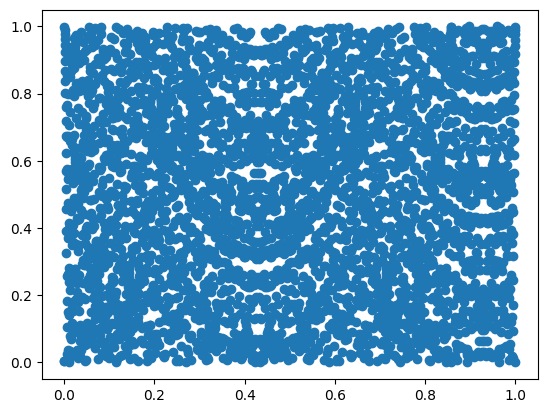

In [16]:
calculate_projection(calculate_f_1, 12)

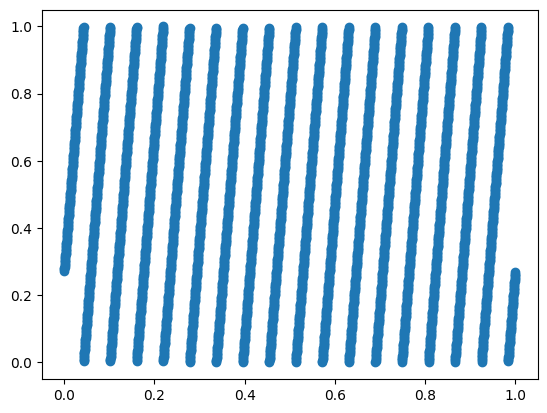

In [17]:
calculate_projection(calculate_g, 12)

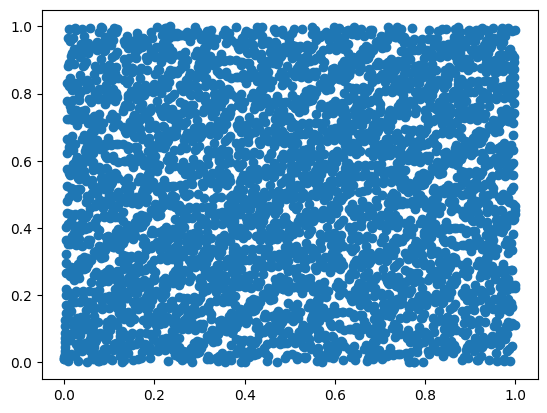

In [18]:
calculate_projection(calculate_f_2, 12)